# 커널 SVM을 사용하여 비선형 문제 풀기

선형적으로 구분되지 않는 데이터를 위한 모형이 Kernel Support Vector Machine이다.  

커널 방법의 기본 아이티어는 매핑함수를 사용하여 원본 특성의 비선형 조합을 선형적으로 구분되는 고차원 공간으로 투영하는 것이다. 이런 매핑 방식의 문제는 새로운 차원의 데이터를 만드는 계산 비용이 높다는 것이다.

커널 방법은 고차원 표현을 실제 만들지 않고 수학적으로 계산된 커널 함수의 계산 결과만을 사용한다. 커널 함수는 저차원에서 고차원 공간의 연산을 가능하게 한다.(거리, 내적)

가장 많이 사용되는 커널 중 하나는 RBF(radial basis function)-방사기저함수이다. 가우시안 커널이라고도 한다.

새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정해야 한다. 분류 결정은 서포트 벡터까지 거리에 기반한다. 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산된다. 대략적으로 말하면 커널이란 용어를 샘플간의 유사도 함수라고 해석할 수 있다. 이 유사도 점수는 1(매우 유사)과 0(매우 다름) 사이의 범위를 가진다.

### 간단한 XOR 데이터셋

두개의 클래스를 선형 초평면으로 구분할 수 없다.

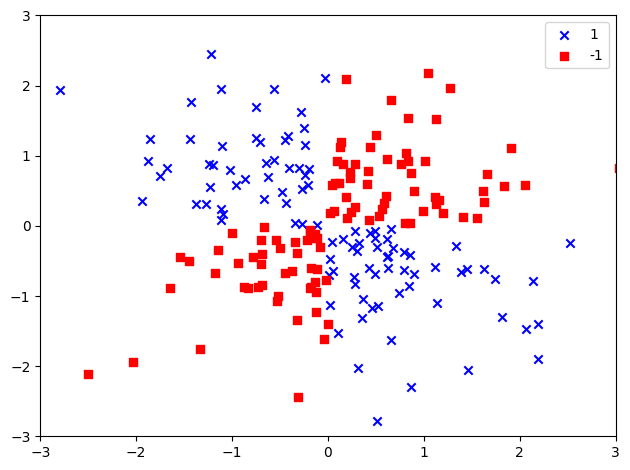

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# 결정경계 시각화 함수
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions (X,y, classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ['red','blue','lightgreen','gray','cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  # meshgrid는 축에 해당하는 1차원 배열을 입력받아 벡터 공간의 모든 좌표를 담은 행렬을 반환한다.

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravel은 입력된 배열을 1차원으로 펼친다.
  # 펼친 2개의 배열을 붙여서 하나의 행렬을 생성, T transpose하여 2개의 열을 만든다. 이 2 열이 xy평면의 좌표이다.

    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha=0.5, levels=[-1,0,1], linestyles=['--','-','--'])
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 같은 Z값을 가지는 영역을 색으로 칠한다. contour는 그리기만, countourf는 색깔칠하기
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x= X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl)



### 커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기

In [ ]:
from sklearn.svm import SVC

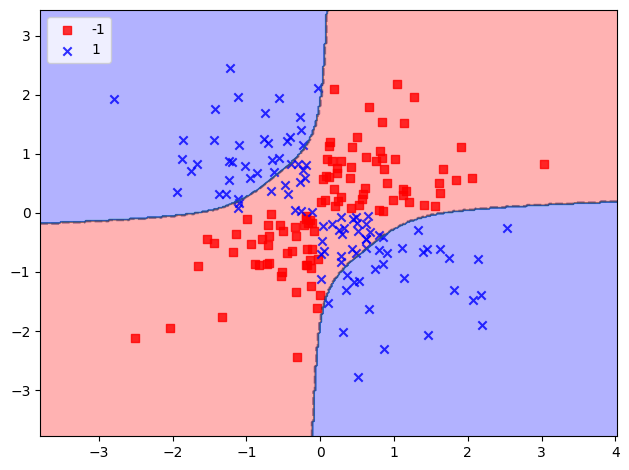

In [ ]:
svm = SVC(kernel='poly', degree=4, C=1.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 주요 파라미터 튜닝

* gamma
    * gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정한다.
    * gamma 값을 크게 하면 서포트 벡터의 영향이나 범위가 줄어든다. 결정경계는 샘플에 가까워지고 구불구불해 진다.(모델이 복잡해진다는 의미)

* C
    * C매개변수는 선형 모델에서 사용한 것과 유사한 규제 매개변수
    * 선형 모델에서처럼 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작아진다.
    * C 값을 크게 하면 데이터에 민감한 결정 경계를 생성한다.

### 커널 기법으로 iris 데이터 셋 분류

### iris 데이터 셋

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


### 해당 데이터 셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### 데이터 스케일 맞추기

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### RBF 커널 SVM 모형

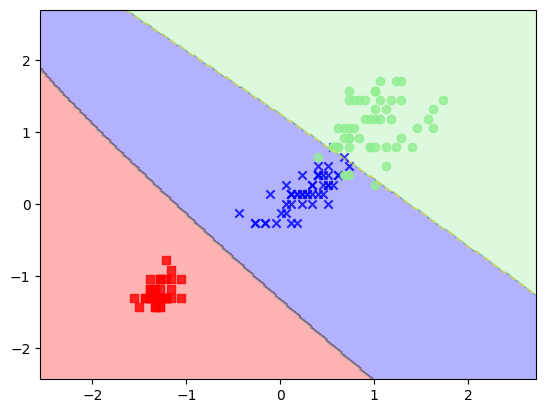

In [ ]:
X_com_std = np.vstack((X_train_std, X_test_std))
y_com = np.hstack((y_train, y_test))

svm = SVC(kernel='rbf',gamma=0.1, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_com_std, y_com,
                      classifier=svm)


### 실습

1. 위에서 생성한 모형에서 gamma값을 100으로 하여 결정경계에 미치는 영향을 파악하시오.

## 실습하기
1. sklearn의 wine 데이터를 다음과 같이 읽어들이시오.
```
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target
```

2. Kernel-SVM을 사용하여 와인의 종류를 분류하는 분류모형을 생성하시오.
